# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(filename, header=0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
df = df.astype({'Positive Review': 'bool'})
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [5]:
# YOUR CODE HERE
X = df['Review']
y = df['Positive Review']

X.head

<bound method NDFrame.head of 0       This was perhaps the best of Johannes Steinhof...
1       This very fascinating book is a story written ...
2       The four tales in this collection are beautifu...
3       The book contained more profanity than I expec...
4       We have now entered a second time of deep conc...
                              ...                        
1968    I purchased the book with the intention of tea...
1969    There are so many design books, but the Graphi...
1970    I am thilled to see this book being available ...
1971    As many have stated before me the book starts ...
1972    I love this book! It is a terrific blend of ha...
Name: Review, Length: 1973, dtype: object>

In [6]:
X.dtype

dtype('O')

In [7]:
y.dtype

dtype('bool')

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [8]:
# Splitting labeled examples into training/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1234)

# Implementing TF-IDF Vectorizer to transform text
tfidf_vec = TfidfVectorizer()
tfidf_vec.fit(X_train)
X_train_tfidf = tfidf_vec.transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

In [9]:
# Fitting a Logistic Regression model to Transformed Training Data
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# Evaluating the data using AUC
probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

len_feature_space = tfidf_vec.vocabulary_
print('The size of the feature space: {0}'.format(len_feature_space))

AUC on the test data: 0.9123
The size of the feature space: {'sorry': 14859, 'this': 16022, 'guy': 7325, 'voice': 17135, 'gave': 6849, 'me': 10006, 'the': 15937, 'creeps': 3897, 'he': 7519, 'sounds': 14875, 'like': 9400, 'preacher': 12230, 'who': 17436, 'can': 2503, 'meditate': 10047, 'without': 17534, 'ability': 350, 'to': 16139, 'respond': 13457, 'positively': 12147, 'leading': 9227, 'novel': 10924, 'could': 3770, 'not': 10897, 'hold': 7740, 'my': 10604, 'interest': 8493, 'am': 877, 'an': 926, 'anne': 994, 'perry': 11751, 'fan': 6098, 'but': 2427, 'get': 6941, 'into': 8553, 'book': 2108, 'couldn': 3771, 'really': 12967, 'bond': 2094, 'with': 17528, 'any': 1053, 'of': 11059, 'characters': 2792, 'and': 950, 'plot': 12010, 'was': 17260, 'uninteresting': 16712, 'disappointed': 4686, 'because': 1734, 'looking': 9545, 'forward': 6600, 'new': 10787, 'series': 14265, 'by': 2440, 'her': 7603, 'joseph': 8834, 'matthew': 9949, 'lost': 9571, 'their': 15945, 'parents': 11499, 'murder': 10566, 'tw

In [10]:
# Experimenting with Different Document Frequency Values

for min_df in [1,10,100,1000]:
    print('\nDocument Frequency Value: {0}'.format(min_df))
    
    tfidf_vec = TfidfVectorizer(ngram_range=(1,2), min_df=min_df)
    tfidf_vec.fit(X_train)
    
    X_train_tfidf = tfidf_vec.transform(X_train)
    X_test_tfidf = tfidf_vec.transform(X_test)
    
    model = LogisticRegression(max_iter=200)
    model.fit(X_train_tfidf, y_train)
    
    probability_predictions = model.predict_proba(X_test_tfidf)[:,1]
    
    auc = roc_auc_score(y_test, probability_predictions)
    print('AUC on the test data: {:.4f}'.format(auc))
    len_feature_space = tfidf_vec.vocabulary_
    print('The size of the feature space: {0}'.format(len_feature_space))


Document Frequency Value: 1
AUC on the test data: 0.9259
The size of the feature space: {'sorry': 101365, 'this': 113572, 'guy': 47571, 'voice': 122176, 'gave': 44623, 'me': 68438, 'the': 108195, 'creeps': 27722, 'he': 49374, 'sounds': 101463, 'like': 64362, 'preacher': 86925, 'who': 125598, 'can': 20402, 'meditate': 68932, 'without': 127368, 'ability': 1152, 'to': 115349, 'respond': 93532, 'positively': 86473, 'leading': 63166, 'sorry this': 101375, 'this guy': 113802, 'guy voice': 47595, 'voice gave': 122182, 'gave me': 44633, 'me the': 68616, 'the creeps': 108964, 'creeps he': 27723, 'he sounds': 49706, 'sounds like': 101469, 'like preacher': 64551, 'preacher who': 86926, 'who can': 125625, 'can meditate': 20518, 'meditate without': 68933, 'without the': 127436, 'the ability': 108269, 'ability to': 1161, 'to respond': 116491, 'respond positively': 93533, 'positively to': 86477, 'to the': 116716, 'the leading': 110052, 'leading voice': 63179, 'novel': 75557, 'could': 26873, 'not': 7

AUC on the test data: 0.9203
The size of the feature space: {'sorry': 2746, 'this': 3149, 'guy': 1271, 'voice': 3448, 'gave': 1202, 'me': 1905, 'the': 2952, 'he': 1327, 'sounds': 2751, 'like': 1784, 'who': 3577, 'can': 570, 'without': 3634, 'ability': 15, 'to': 3207, 'leading': 1747, 'me the': 1912, 'who can': 3579, 'ability to': 16, 'to the': 3291, 'novel': 2105, 'could': 729, 'not': 2073, 'hold': 1398, 'my': 2003, 'interest': 1540, 'am': 108, 'an': 119, 'fan': 1046, 'but': 524, 'get': 1210, 'into': 1548, 'book': 436, 'couldn': 733, 'really': 2503, 'with': 3612, 'any': 222, 'of': 2120, 'characters': 619, 'and': 127, 'plot': 2357, 'was': 3465, 'disappointed': 838, 'because': 378, 'looking': 1824, 'forward': 1162, 'new': 2049, 'series': 2657, 'by': 558, 'her': 1362, 'lost': 1832, 'their': 3089, 'parents': 2290, 'murder': 1996, 'two': 3356, 'close': 654, 'friends': 1181, 'yet': 3697, 'there': 3107, 'didn': 823, 'seem': 2639, 'be': 360, 'much': 1988, 'emotion': 931, 'maybe': 1904, 'ms': 1

AUC on the test data: 0.8400
The size of the feature space: {'this': 189, 'me': 113, 'the': 172, 'he': 75, 'like': 101, 'who': 221, 'can': 39, 'without': 226, 'to': 197, 'to the': 200, 'novel': 125, 'could': 41, 'not': 123, 'my': 118, 'am': 6, 'an': 7, 'but': 36, 'get': 65, 'into': 90, 'book': 31, 'really': 152, 'with': 224, 'any': 12, 'of': 127, 'characters': 40, 'and': 8, 'was': 211, 'because': 24, 'new': 121, 'by': 37, 'her': 76, 'their': 178, 'two': 202, 'there': 181, 'didn': 43, 'be': 23, 'much': 116, 'too': 201, 'many': 111, 'one': 135, 'story': 165, 'in': 85, 'it': 94, 'hard': 71, 'point': 146, 'why': 222, 'would': 229, 'read': 148, 'this book': 190, 'of the': 129, 'and the': 10, 'to be': 198, 'the book': 174, 'here': 77, 'is': 91, 'are': 15, 'that': 169, 'however': 82, 'you': 233, 'feel': 56, 'for': 60, 'how': 81, 'after': 2, 'pages': 144, 'both': 35, 'just': 98, 'old': 132, 'through': 194, 'where': 218, 'on': 133, 've': 207, 'made': 107, 'some': 162, 'each': 49, 'look': 104, '

In [11]:
# Setting up TF-IDF + Logistic Regression Pipeline (using min_df)

print('Beginning ML pipeline')

s = [
    ("vectorizer", TfidfVectorizer(ngram_range=(1,2), min_df=10)),
    ("model", LogisticRegression(max_iter=200))
]

model_pipeline = Pipeline(steps=s)
model_pipeline.fit(X_train, y_train)

probability_predictions = model_pipeline.predict_proba(X_test)[:,1]

print('End pipeline')

Beginning ML pipeline
End pipeline


In [12]:
# Evaluating performance by computing the AUC

auc_score = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc_score))

AUC on the test data: 0.9203


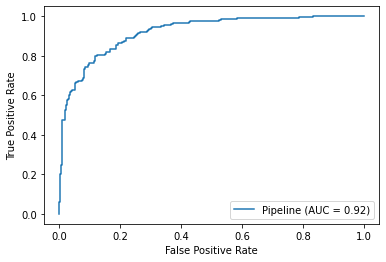

In [13]:
plot_roc_curve(model_pipeline, X_test, y_test)

In [14]:
model_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vectorizer', 'model', 'vectorizer__analyzer', 'vectorizer__binary', 'vectorizer__decode_error', 'vectorizer__dtype', 'vectorizer__encoding', 'vectorizer__input', 'vectorizer__lowercase', 'vectorizer__max_df', 'vectorizer__max_features', 'vectorizer__min_df', 'vectorizer__ngram_range', 'vectorizer__norm', 'vectorizer__preprocessor', 'vectorizer__smooth_idf', 'vectorizer__stop_words', 'vectorizer__strip_accents', 'vectorizer__sublinear_tf', 'vectorizer__token_pattern', 'vectorizer__tokenizer', 'vectorizer__use_idf', 'vectorizer__vocabulary', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [15]:
# Defining hyperparameters we want to pass to GridSearchCV

param_grid = {'vectorizer__ngram_range':[(1,1), (1,2)], 'model__C':[0.1,1,10]}
param_grid

{'model__C': [0.1, 1, 10], 'vectorizer__ngram_range': [(1, 1), (1, 2)]}

In [16]:
print('Running Grid Search...')

# Using 3 fold cross-validation to determine 

grid = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] model__C=0.1, vectorizer__ngram_range=(1, 1) ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 1) ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 1) ....................
[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 2) ....................
[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 2), total=   0.8s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 2) ....................
[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 2), total=   0.7s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 2) ....................
[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 2), total=   0.7s
[CV] model__C=1, vectorizer__ngram_range=(1, 1) ......................
[CV] ....... model__C=1, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=1, vectorizer__ngram_range=(1, 1) ......................
[CV] ....... model__C=1, vectorizer__ngram_range=(1, 1), total=   0.2s
[CV] model__C=1, vectorizer__ngram_range=(1, 1) ......................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    9.2s finished


Done


In [17]:
# Best Pipeline
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=10, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_

In [18]:
# Best parameters
grid_search.best_params_

{'model__C': 10, 'vectorizer__ngram_range': (1, 2)}

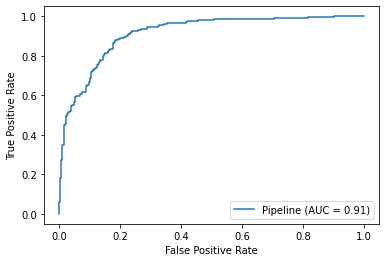

In [19]:
plot_roc_curve(grid_search.best_estimator_, X_test, y_test)